# Install necessary libraries

In [3]:
!pip install scikit-learn

# Import libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a synthetic dataset
# Features: ['age', 'length_of_stay', 'previous_admissions']
# Target: 1 if readmitted, 0 otherwise

In [5]:
np.random.seed(42)
data = {
    'age': np.random.randint(30, 90, 100),
    'length_of_stay': np.random.randint(1, 15, 100),
    'previous_admissions': np.random.randint(0, 5, 100),
    'readmitted': np.random.choice([0, 1], 100, p=[0.6, 0.4])  # 40% readmission rate
}

df = pd.DataFrame(data)


# Features and target

In [6]:
X = df[['age', 'length_of_stay', 'previous_admissions']]
y = df['readmitted']


# Split the dataset into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model

In [8]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

# Predict on test data

In [9]:
y_pred = model.predict(X_test)


# Compute confusion matrix

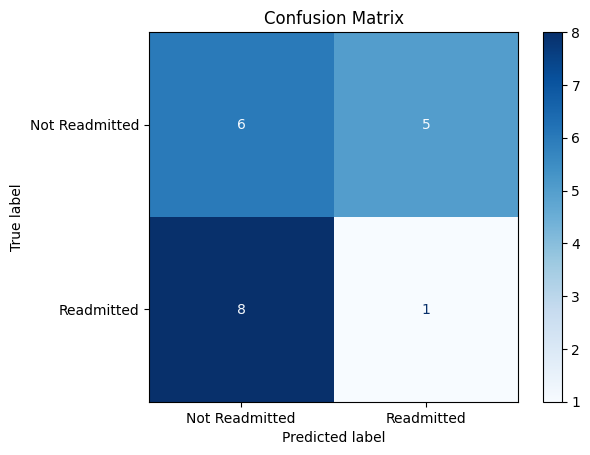

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Readmitted", "Readmitted"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Calculate precision and recall

In [11]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics

In [12]:
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.17
Recall: 0.11
